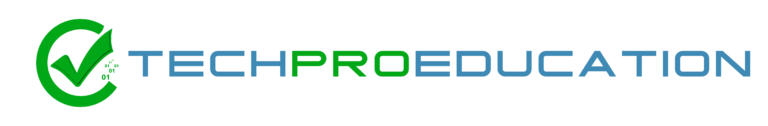

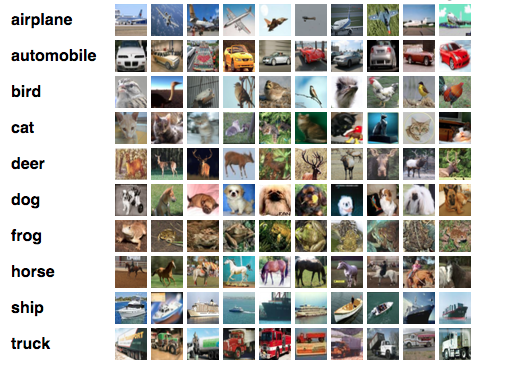

In [1]:
import tensorflow as tf

In [2]:
import pandas as pd
import seaborn as sns
import tensorflow as tf                       
import numpy as np                           
import matplotlib.pyplot as plt               
%matplotlib inline

In [3]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# (X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [4]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  50000 images in the training dataset
There are  10000 images in the test dataset


The CIFAR-10 dataset
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

In [5]:
# Checking the shape of one image
X_train[5].shape

(32, 32, 3)

In [6]:
X_train[5]

array([[[159, 102, 101],
        [150,  91,  95],
        [153,  95,  97],
        ...,
        [ 91,  71,  56],
        [ 74,  63,  55],
        [ 76,  58,  55]],

       [[142,  75,  68],
        [146,  72,  66],
        [155,  76,  65],
        ...,
        [127, 105,  71],
        [122, 111,  93],
        [ 86,  69,  61]],

       [[109,  67,  75],
        [ 99,  58,  60],
        [105,  59,  52],
        ...,
        [137, 112,  80],
        [163, 132, 105],
        [ 93,  72,  71]],

       ...,

       [[244, 129,  70],
        [240, 123,  65],
        [241, 122,  65],
        ...,
        [156,  42,  15],
        [179,  59,  26],
        [200,  73,  36]],

       [[246, 133,  74],
        [243, 128,  72],
        [243, 127,  70],
        ...,
        [162,  44,  14],
        [178,  56,  22],
        [192,  65,  27]],

       [[246, 139,  82],
        [243, 133,  78],
        [244, 132,  77],
        ...,
        [166,  47,  14],
        [173,  51,  17],
        [182,  57,  19]]

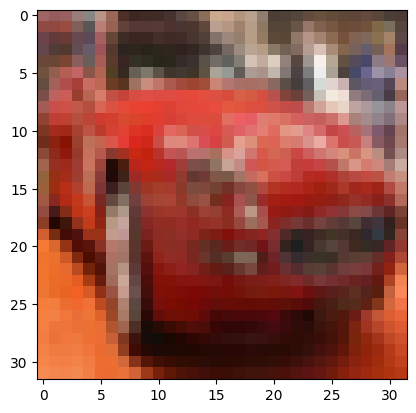

In [7]:
plt.imshow(X_train[5]);

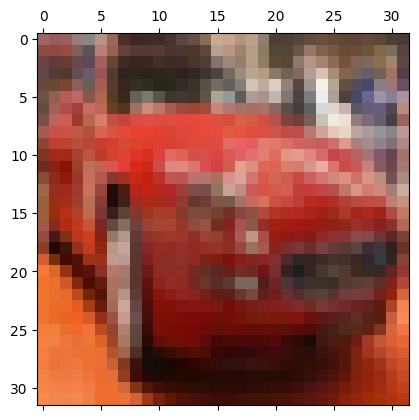

In [8]:
plt.matshow(X_train[5]);

In [9]:
y_train[5]

array([1], dtype=uint8)

In [10]:
y_train.shape

(50000, 1)

In [11]:
y_train  # bunların hepsi birer skala değer, bu şekilde modele verirsek model bunun regresyon problem olduğunu düşünür. 

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [12]:
np.unique(y_train, return_counts=True)   # Array içindeki unique değerleri gösteriyor. 
#return_counts= True ile bu değerlerin sayılarını da görmüş oluyoruz.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
       dtype=int64))

**Class names:**

- 0: Airplane
- 1: Automobile
- 2: Bird
- 3: Cat
- 4: Deer
- 5: Dog
- 6: Frog
- 7: Horse
- 8: Ship
- 9: Truck

In [13]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [14]:
y_train[3]

array([4], dtype=uint8)

In [15]:
classes[int(y_train[3])]   # bunu indeksleyebiliyoruz. 

'deer'

In [16]:
int(np.random.randint(low=0, high=50000, size=1))  # 0 ile 50.000 arasında rastgele bir sayı döndürecek.

18960

In [17]:
np.random.randint(low=0, high=50000, size=17) 

array([ 2068, 38101,  6416, 44795, 22978,   498, 26847, 15702,  5440,
       20661, 47626, 31033, 33191, 28932, 14373, 36289, 16661])

In [18]:
np.random.randint(low=0, high=50000, size=17) 

array([39060, 44416, 13910, 18908, 12373, 17240, 14311, 40249, 12565,
       21967, 32241, 12912,  4233,  7376, 48582, 25999,  5468])

In [19]:
X_train[int(np.random.randint(low=0, high=50000, size=1))]   # X Train içindeki bir resmi rastgele seçmiş oluyor. 

array([[[ 92,  81,  85],
        [ 90,  79,  83],
        [ 89,  78,  82],
        ...,
        [ 97,  86,  90],
        [ 98,  87,  92],
        [101,  91,  94]],

       [[ 89,  77,  81],
        [ 86,  75,  79],
        [ 86,  75,  79],
        ...,
        [ 99,  88,  92],
        [100,  89,  93],
        [103,  92,  95]],

       [[ 86,  75,  79],
        [ 84,  73,  77],
        [ 84,  73,  77],
        ...,
        [101,  90,  92],
        [102,  92,  93],
        [104,  94,  96]],

       ...,

       [[164, 176, 175],
        [160, 172, 171],
        [159, 170, 169],
        ...,
        [184, 209, 205],
        [184, 210, 206],
        [188, 212, 209]],

       [[167, 181, 178],
        [167, 179, 177],
        [168, 179, 177],
        ...,
        [181, 205, 200],
        [179, 204, 200],
        [181, 205, 202]],

       [[164, 174, 171],
        [161, 169, 167],
        [159, 166, 165],
        ...,
        [175, 197, 192],
        [175, 198, 194],
        [179, 201, 197]]

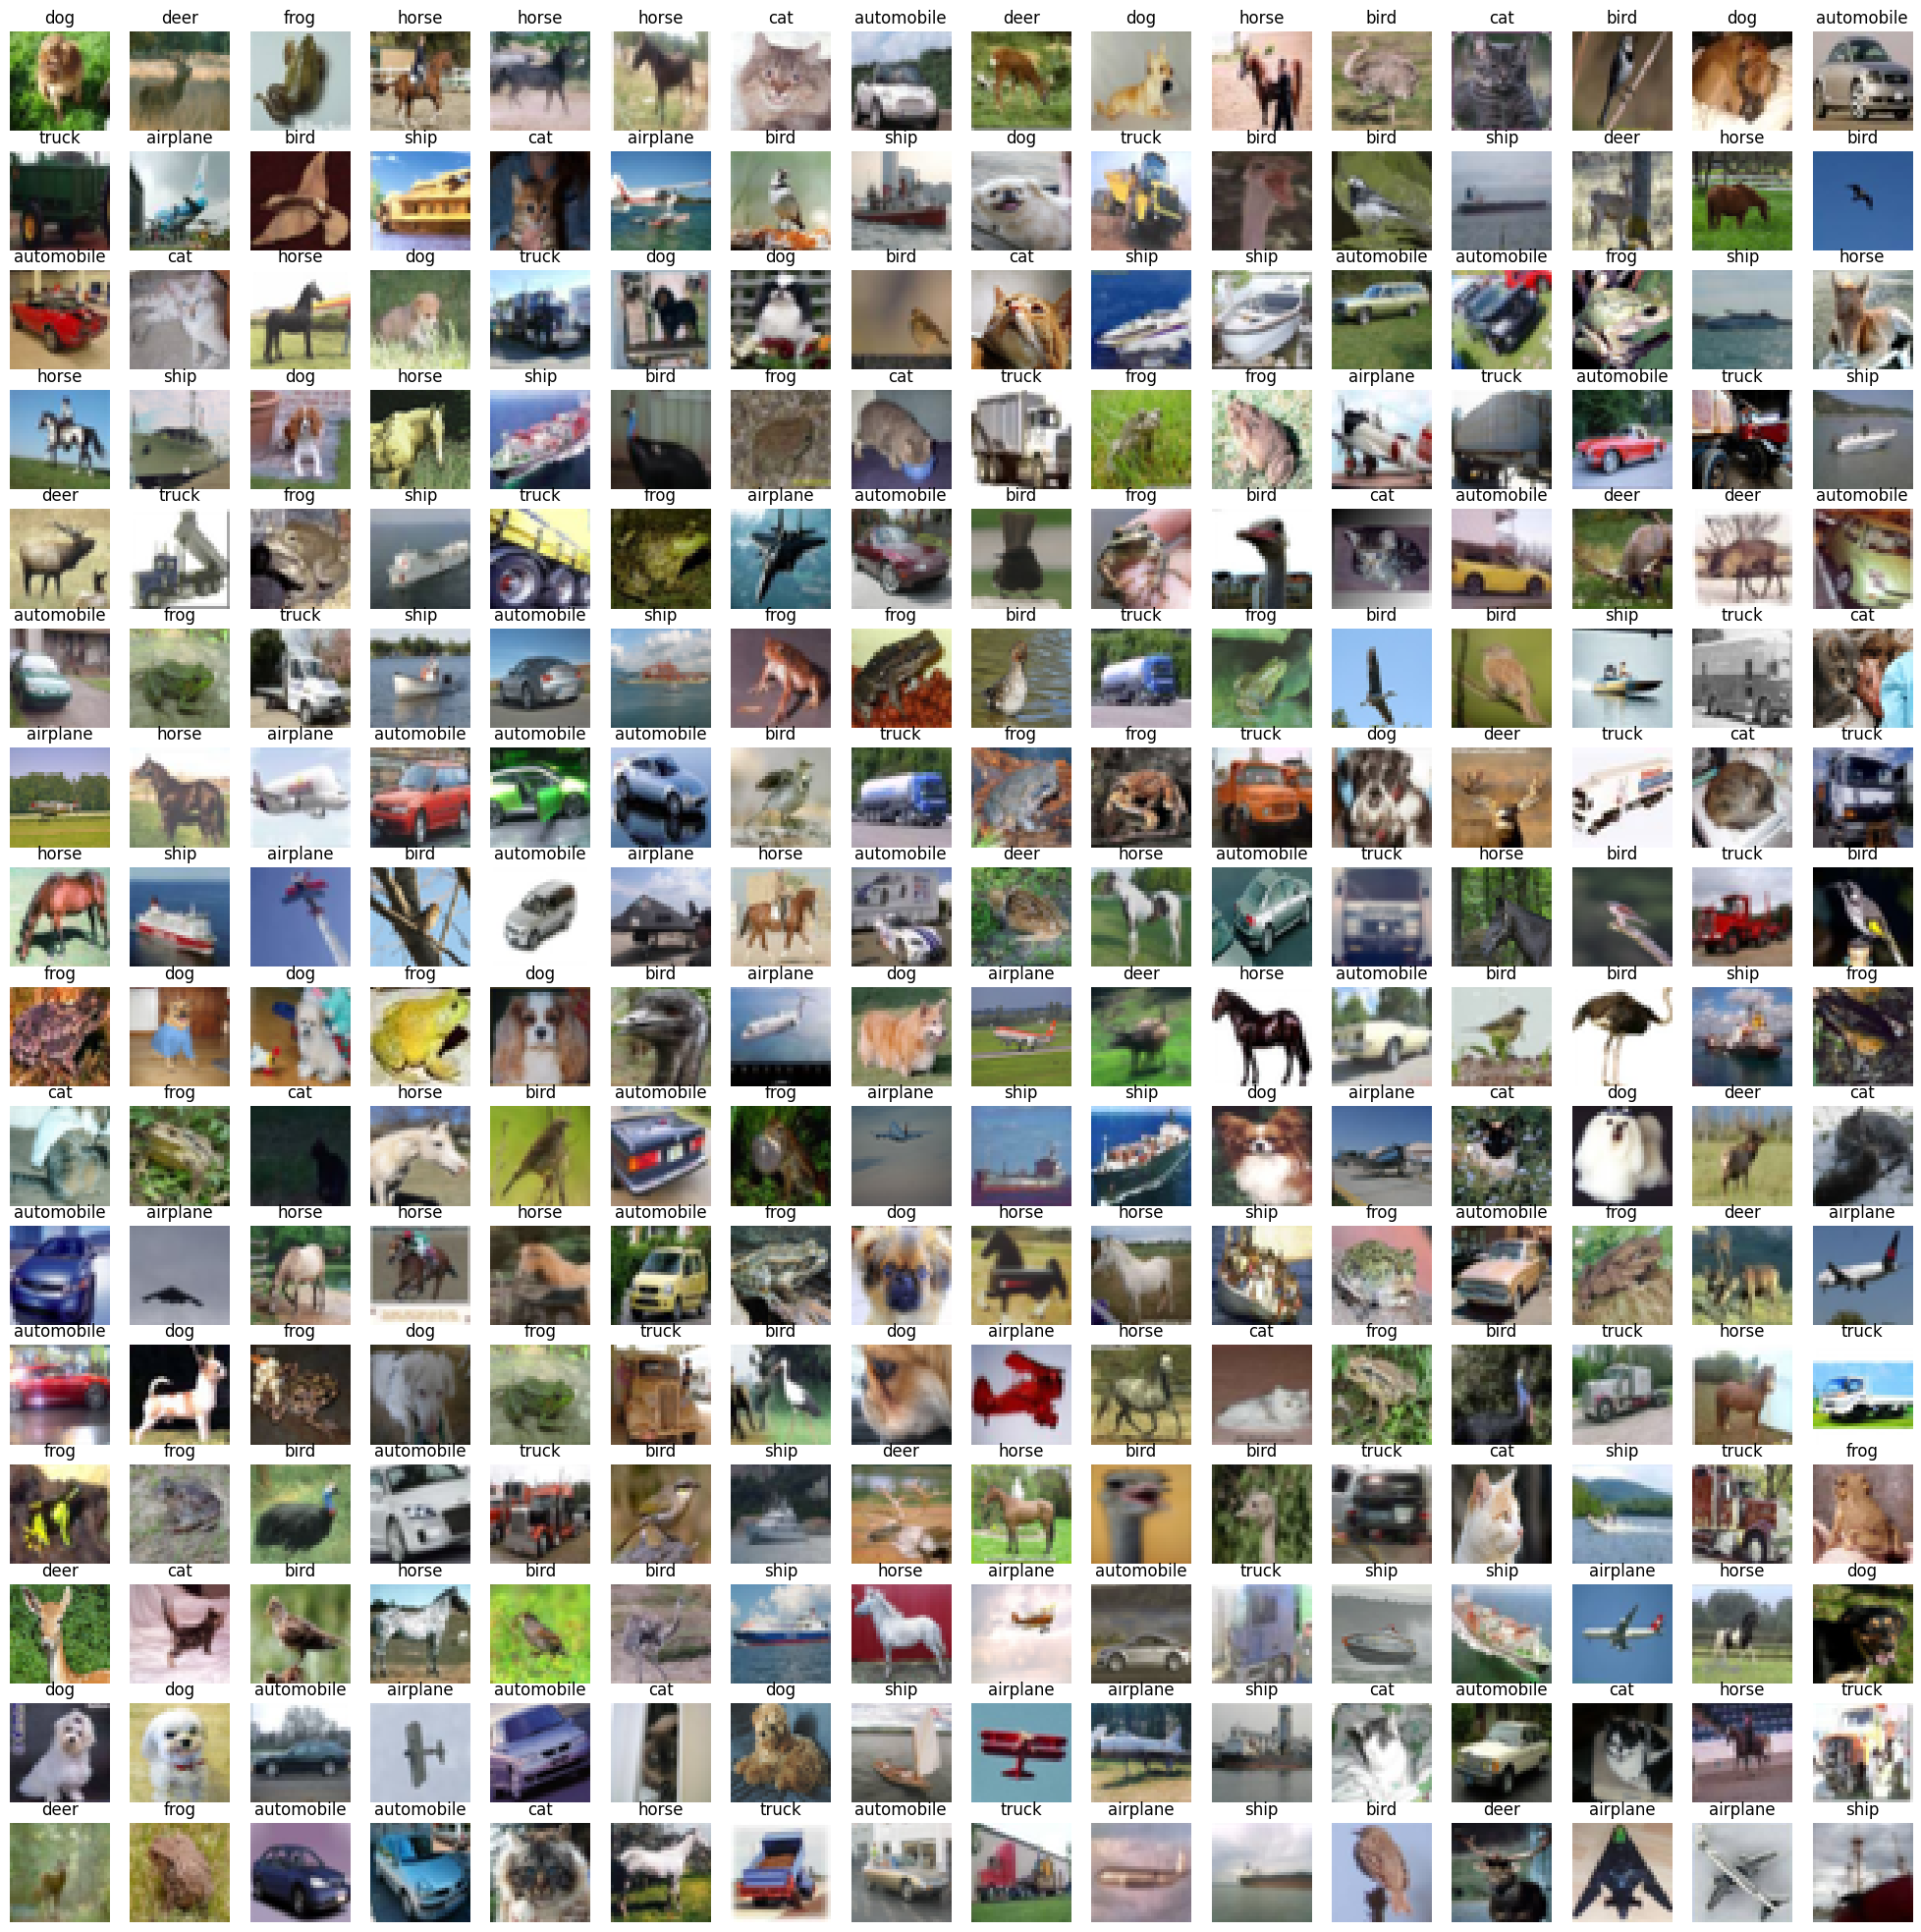

In [20]:
plt.figure(figsize=(25, 25))
for i in range(256):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(16, 16, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index])    

## Data Preprocessing

In [21]:
X_train[5].min()

0

In [22]:
X_train[5].max()

252

In [23]:
# Normalize image pixels
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [24]:
X_train[5].min()

0.0

In [25]:
X_train[5].max()

0.9882353

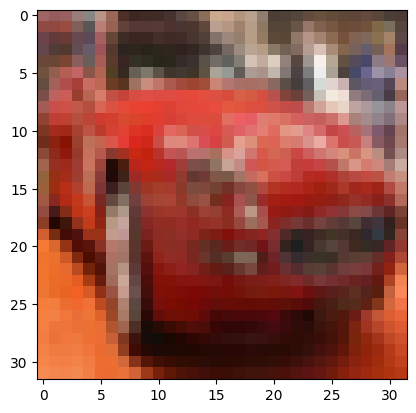

In [26]:
plt.imshow(X_train[5]);

In [27]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [28]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

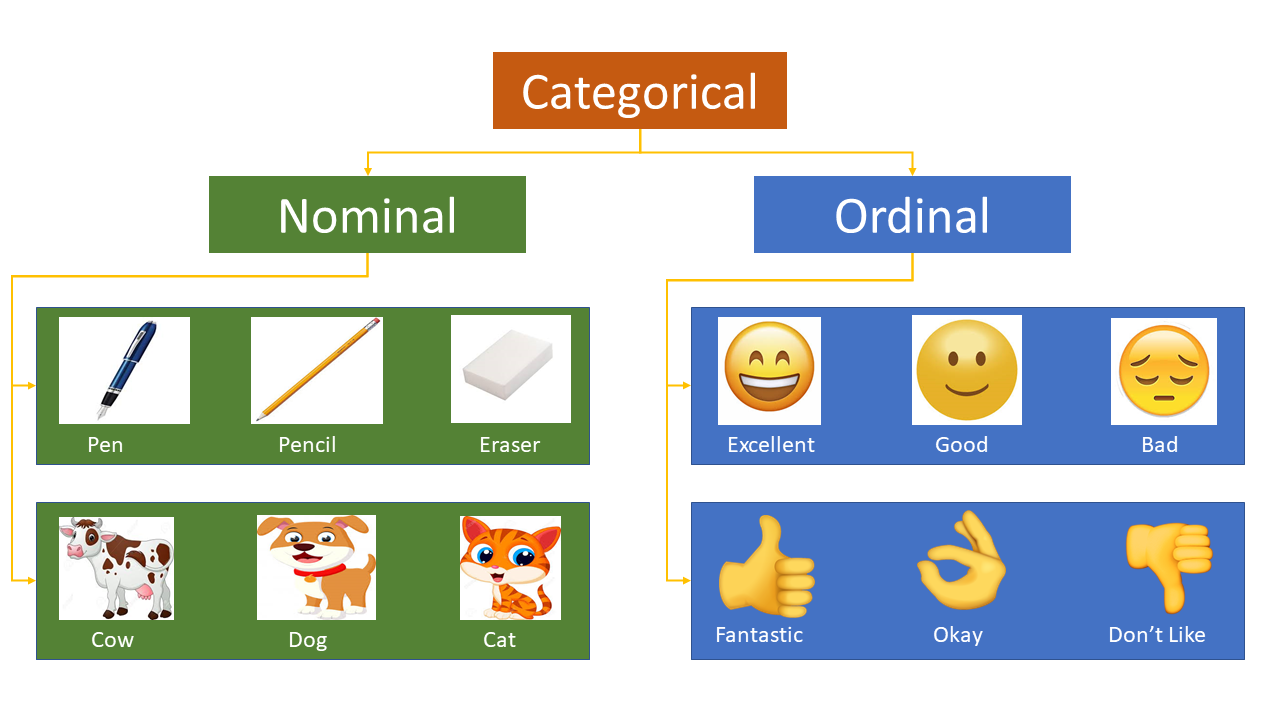

In [29]:
from tensorflow.keras.utils import to_categorical

In [30]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_test.shape

(10000, 10)

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [32]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(32, 32, 3), activation='relu', padding='same'))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

C:\Users\nsgr6\.conda\envs\myenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                    │ (None, 32, 32, 32)            │         896 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv2d_1 (Conv2D)                  │ (None, 32, 32, 64)            │      18,496 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling2d (MaxPooling2D)       │ (None, 16, 16, 64)            │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv2d_2 (Conv2D)                  │ (None, 16, 16, 32)            │      18,464 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling2d_1 (MaxPooling2D)     │ (None, 8, 8, 32)              │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ flatten (Flatten)                  │ (None, 2048)                  │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense (Dense)                      │ (None, 128)                   │     262,272 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_1 (Dense)                    │ (None, 64)                    │       8,256 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_2 (Dense)                    │ (None, 10)                    │         650 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 309,034 (1.18 MB)

 Trainable params: 309,034 (1.18 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
early_stop = EarlyStopping(monitor='val_loss',patience=25)

In [36]:
model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 26ms/step - accuracy: 0.3973 - loss: 1.6442 - val_accuracy: 0.6291 - val_loss: 1.0502
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - accuracy: 0.6576 - loss: 0.9754 - val_accuracy: 0.6916 - val_loss: 0.8776
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 32ms/step - accuracy: 0.7269 - loss: 0.7791 - val_accuracy: 0.7090 - val_loss: 0.8513
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.7692 - loss: 0.6587 - val_accuracy: 0.7202 - val_loss: 0.8048
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.7986 - loss: 0.5732 - val_accuracy: 0.7374 - val_loss: 0.7815
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.8282 - loss: 0.4852 - val_accuracy: 0.7184 - val_loss: 0.8861
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 32ms/step - accuracy: 0.8500 - loss: 0.4209 - val_accuracy: 0.7315 - val_loss: 0.8692
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 

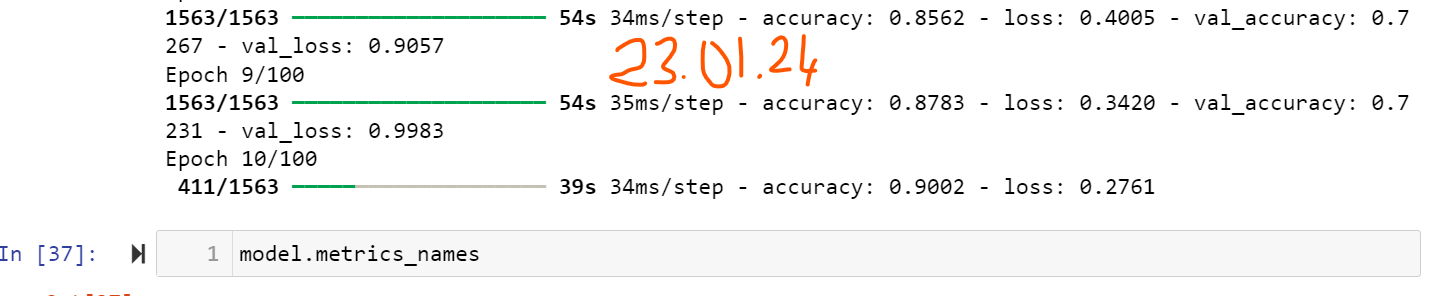

In [37]:
model.metrics_names

In [38]:
model.history.history

In [39]:
summary = pd.DataFrame(model.history.history)
summary.head()

In [40]:
plt.figure(figsize=(15, 6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

In [41]:
plt.figure(figsize=(15, 6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [42]:
print(model.evaluate(X_test, Y_test, verbose=1))

In [43]:
from sklearn.metrics import classification_report,confusion_matrix, plot_confusion_matrix

In [ ]:
preds = model.predict(X_test)


In [ ]:
predictions = np.argmax(preds, axis=1)

In [ ]:
predictions

In [ ]:
print(classification_report(y_test, predictions))

In [ ]:
print(confusion_matrix(y_test, predictions))

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
my_image = X_test[44]

In [ ]:
plt.imshow(my_image);

In [ ]:
image_prediction = model.predict(my_image.reshape(1,32,32,3))

In [ ]:
image_prediction

In [ ]:
np.argmax(image_prediction, axis=1)

In [ ]:
result=np.argmax(image_prediction, axis=1)

In [ ]:
result

In [ ]:
classes[int(result)]

In [ ]:
#model.save("cnn-1.h5")

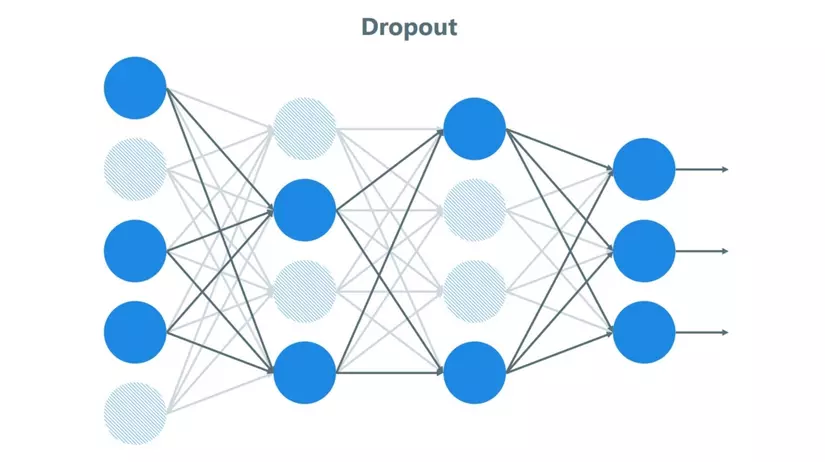

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=25)

In [ ]:
model= Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3), padding='same'))
        
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu', padding='same'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))
    
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))
        
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_test,Y_test), callbacks=[early_stop])

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
preds = model.predict(X_test)
predictions= np.argmax(preds, axis=1)

In [ ]:
print(classification_report(y_test, predictions))

In [ ]:
print(confusion_matrix(y_test, predictions))

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

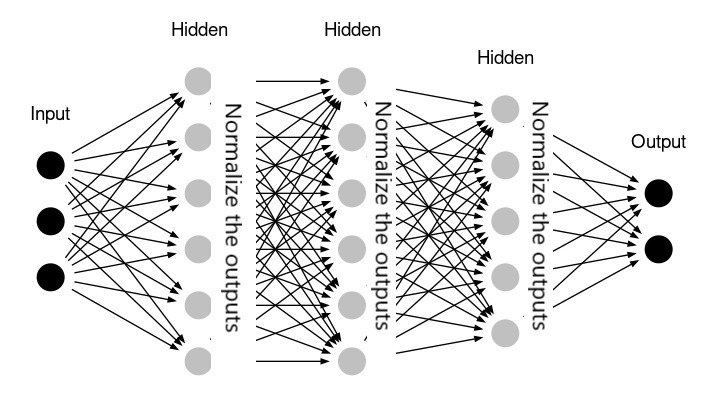

In [ ]:
from tensorflow.keras.layers import BatchNormalization

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=25)

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.5))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.5))

model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.5))


model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))    # num_classes = 10

# Checking the model summary
model.summary()

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_test,Y_test), callbacks=[early_stop])

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
preds = model.predict(X_test)
predictions= np.argmax(preds, axis=1)

In [ ]:
print(classification_report(y_test, predictions))

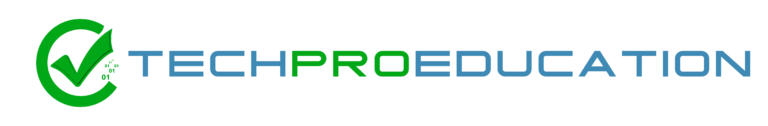